In [2]:
import pandas as pd # for data loading and cleaning
import numpy as np  #
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
data = pd.read_csv("C:\\Users\\chris\\OneDrive\\Documents\\Desktop\\student_performance_dataset.csv")

In [3]:
df = pd.DataFrame(data)
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,GPA,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,ClubInvolvement,Sports,Music,Volunteering,GradeClass
0,1001,17,19.833723,7,2.929196,Female,Caucasian,Some College,Yes,Moderate,No,No,Yes,No,C
1,1002,18,15.408756,0,3.042915,Male,Caucasian,High School,No,Low,No,No,No,No,B
2,1003,15,4.210570,26,0.112602,Male,Asian,Bachelor's,No,Moderate,No,No,No,No,F
3,1004,17,10.028829,14,2.054218,Female,Caucasian,Bachelor's,No,High,Yes,No,No,No,D
4,1005,17,4.672495,17,1.288061,Female,Caucasian,Some College,Yes,High,No,No,No,No,F


### Handling Data Preprocessing and cleaning
#### Check:
- Data Information and the Data Size
- Missing Values
-  Remove Duplicate (if any duplicate)
- Filling the missing value with Simple Imputer
- Fixing Datatype (e.g., change dtype, categorical encoding)



In [5]:
print(df.info(), f" The shape of the dataset is {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          6055 non-null   int64  
 1   Age                6055 non-null   int64  
 2   StudyTimeWeekly    6055 non-null   float64
 3   Absences           6055 non-null   int64  
 4   GPA                6055 non-null   float64
 5   Gender             6055 non-null   object 
 6   Ethnicity          6055 non-null   object 
 7   ParentalEducation  5645 non-null   object 
 8   Tutoring           6055 non-null   object 
 9   ParentalSupport    5755 non-null   object 
 10  ClubInvolvement    6055 non-null   object 
 11  Sports             6055 non-null   object 
 12  Music              6055 non-null   object 
 13  Volunteering       6055 non-null   object 
 14  GradeClass         6055 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 709.7+ KB
None  The sh

In [6]:
df.isna().sum() #checking for null values in the columns

StudentID              0
Age                    0
StudyTimeWeekly        0
Absences               0
GPA                    0
Gender                 0
Ethnicity              0
ParentalEducation    410
Tutoring               0
ParentalSupport      300
ClubInvolvement        0
Sports                 0
Music                  0
Volunteering           0
GradeClass             0
dtype: int64

In [7]:
print(f"The number of duplicate value is {df.duplicated().sum()}") # the first check for duplicate while the later remove the column StujdentID 
df.drop("StudentID",axis=1,inplace =True, errors = "Ignore")

The number of duplicate value is 0


In [8]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer for handling missing values

def value_imputer(data): #defining function for missing value
    imp = SimpleImputer(strategy="most_frequent")  # Using the most frequent value to fill missing values
    for col in data.columns:  # Iterating through all columns
        if data[col].isna().any():  # Checking if the column contains any missing values
            data[col] = imp.fit_transform(data[[col]]).ravel() # Imputing missing values; the ravel() convert the 2D back to 1D array 
    return data.isna().sum()  # Returning the count of missing values in the dataset after imputation


value_imputer(df)


Age                  0
StudyTimeWeekly      0
Absences             0
GPA                  0
Gender               0
Ethnicity            0
ParentalEducation    0
Tutoring             0
ParentalSupport      0
ClubInvolvement      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64

### Exploratory Data Analysis
#### Check:
- Number of Unique value of each column
- Descriptive Statistics
- Distribution
- Visualization of data
    -categorical features
- Categorical encoding
- Correlations 

#### 1. Checking the unique value in each column

In [17]:
# checking for the number of unique value in each column
df.nunique()

Age                     4
StudyTimeWeekly      6055
Absences               30
GPA                  6025
Gender                  2
Ethnicity               4
ParentalEducation       4
Tutoring                2
ParentalSupport         4
ClubInvolvement         2
Sports                  2
Music                   2
Volunteering            2
GradeClass              5
dtype: int64

#### 2. Check the data summary

In [20]:
# Descriptive Statictics
df.describe()

,Age,StudyTimeWeekly,Absences,GPA
count,6055.000000,6055.000000,6055.000000,6055.000000
mean,16.246738,10.377286,9.841949,2.436893
std,1.033417,5.651446,8.151560,0.909238
min,15.000000,0.001057,0.000000,0.000000
25%,15.000000,5.561924,3.000000,1.879337
50%,16.000000,10.394700,8.000000,2.561965
75%,17.000000,15.194024,15.000000,3.165419
max,18.000000,19.978094,29.000000,4.000000


#### Unique Entities in each column

In [23]:
def VC(df):
    for col in df.columns:
        if df[col].dtype == "object":
            Unique_data= df[col].value_counts()
       
            print( Unique_data,"\n*********************************************************")

VC(df)

Gender
Female    3035
Male      3020
Name: count, dtype: int64 
*********************************************************
Ethnicity
Caucasian           3576
African American    1173
Asian                955
Other                351
Name: count, dtype: int64 
*********************************************************
ParentalEducation
Some College    3262
High School     1986
Bachelor's       677
Higher           130
Name: count, dtype: int64 
*********************************************************
Tutoring
No     4076
Yes    1979
Name: count, dtype: int64 
*********************************************************
ParentalSupport
High         2594
Moderate     1749
Low          1015
Very High     697
Name: count, dtype: int64 
*********************************************************
ClubInvolvement
No     3533
Yes    2522
Name: count, dtype: int64 
*********************************************************
Sports
No     4391
Yes    1664
Name: count, dtype: int64 
**********************

## Visualization of Categorical features

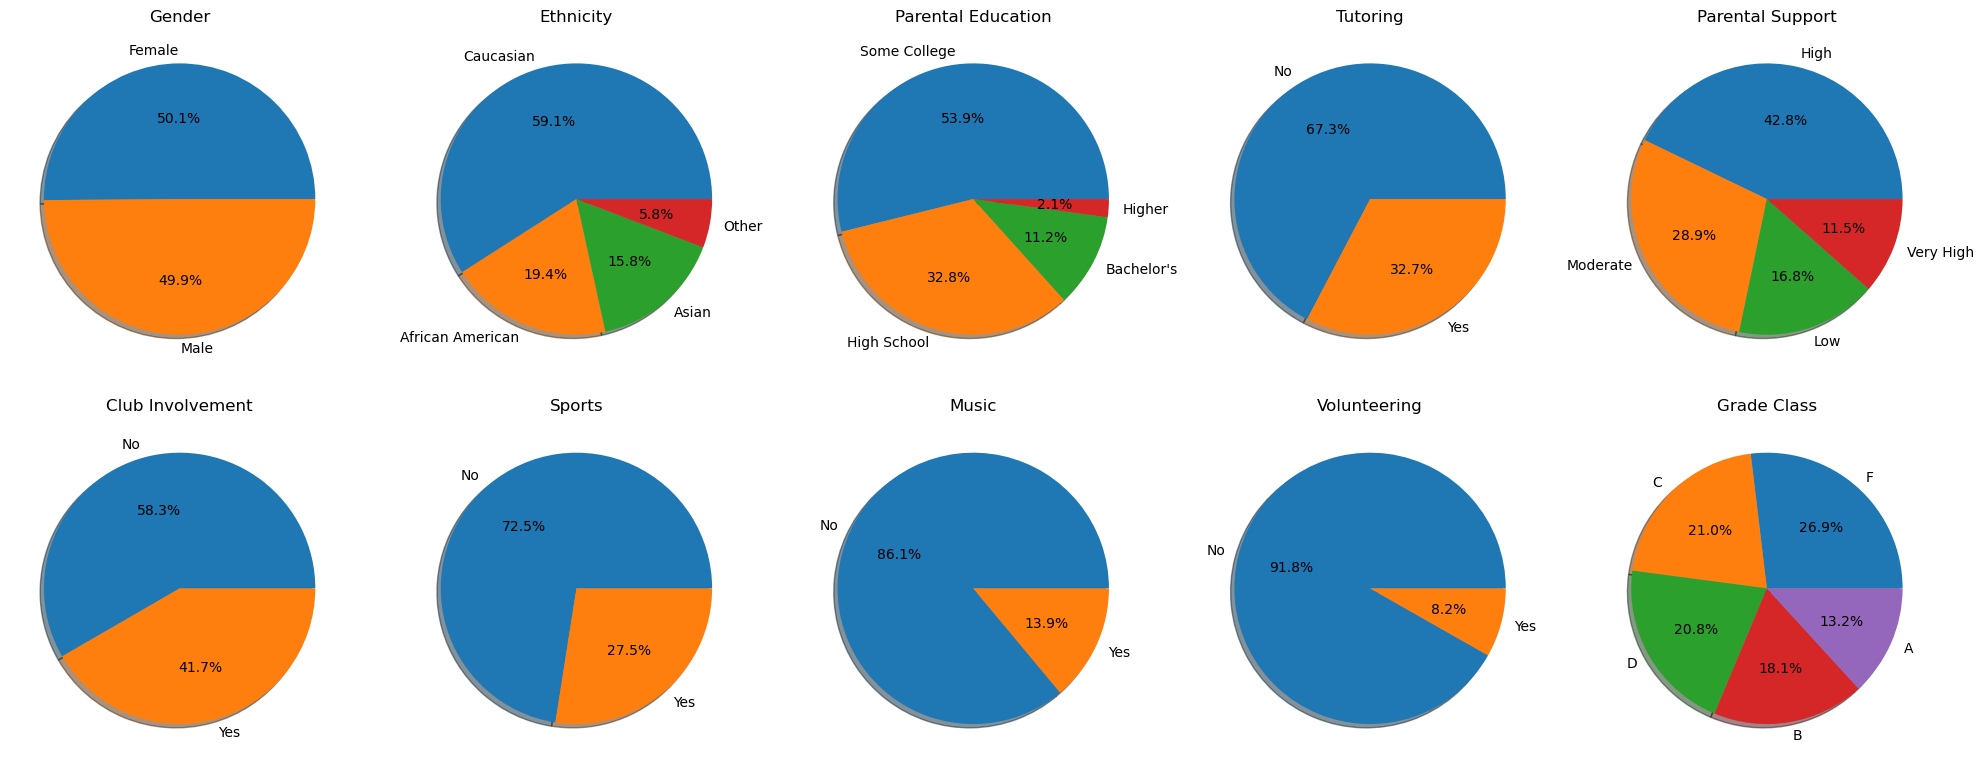

In [26]:
import matplotlib.pyplot as plt

# Create a figure with a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()  # Flatten to make it easier to index 

# First row subplots
axs[0].pie(df["Gender"].value_counts(),
           autopct="%1.1f%%",
           labels=df["Gender"].value_counts().index,
           shadow=True)
axs[0].set_title("Gender")

# 2nd subplots
axs[1].pie(df["Ethnicity"].value_counts(),
           autopct="%1.1f%%",
           labels=df["Ethnicity"].value_counts().index,
           shadow=True)
axs[1].set_title("Ethnicity")

# 3rd subplot
axs[2].pie(df["ParentalEducation"].value_counts(),
           autopct="%1.1f%%",
           labels=df["ParentalEducation"].value_counts().index,
           shadow=True)
axs[2].set_title("Parental Education")

# 4th subplots
axs[3].pie(df["Tutoring"].value_counts(),
           autopct="%1.1f%%",
           labels=df["Tutoring"].value_counts().index,
           shadow=True)
axs[3].set_title("Tutoring")

# 5th subplots
axs[4].pie(df["ParentalSupport"].value_counts(),
           autopct="%1.1f%%",
           labels=df["ParentalSupport"].value_counts().index,
           shadow=True)
axs[4].set_title("Parental Support")

# Second row subplots
axs[5].pie(df["ClubInvolvement"].value_counts(),
           autopct="%1.1f%%",
           labels=df["ClubInvolvement"].value_counts().index,
           shadow=True)
axs[5].set_title("Club Involvement")

axs[6].pie(df["Sports"].value_counts(),
           autopct="%1.1f%%",
           labels=df["Sports"].value_counts().index,
           shadow=True)
axs[6].set_title("Sports")

axs[7].pie(df["Music"].value_counts(),
           autopct="%1.1f%%",
           labels=df["Music"].value_counts().index,
           shadow=True)
axs[7].set_title("Music")

axs[8].pie(df["Volunteering"].value_counts(),
           autopct="%1.1f%%",
           labels=df["Volunteering"].value_counts().index,
           shadow=True)
axs[8].set_title("Volunteering")

axs[9].pie(df["GradeClass"].value_counts(),
           autopct="%1.1f%%",
           labels=df["GradeClass"].value_counts().index,
           shadow=True)
axs[9].set_title("Grade Class")

# Adjust layout spacing
plt.tight_layout()
plt.show()


### Feature Engineering  
- Data Encoding with OneHot Emncoder
- data splitting

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Identify columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()  # Categorical features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()  # Numerical features

# Assume the target column is named "GPA"
target_col = "GPA"

# Remove the target column from the feature lists if present
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# 2. Create a ColumnTransformer for Encoding
# Use OneHotEncoder for categorical variables (drop='first' to avoid dummy variable trap)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Example: Transform the features (without the target)
X = df.drop(target_col, axis=1)
X_processed = preprocessor.fit_transform(X)
print("Shape of processed features:", X_processed.shape)


Shape of processed features: (6055, 22)


In [37]:
# 3. Split Features and Target
# --------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target variable (GPA)
y = df[target_col]  # Target variable
X = df.drop(target_col, axis=1)  # Features

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")


Feature scaling complete.


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}\nR² Score: {r2}")


Model Performance:
MAE: 0.138303037141384
MSE: 0.03211956388613404
R² Score: 0.9601207486389901


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the models to test
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Display the performance comparison
print("Model Performance Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Model Performance Comparison:

Decision Tree:
  MAE: 0.12760619084227912
  MSE: 0.03990051680244689
  R²: 0.9504600141944675

Random Forest:
  MAE: 0.09827707860881915
  MSE: 0.020553320675007144
  R²: 0.9744812524725501

Gradient Boosting:
  MAE: 0.11654155970382223
  MSE: 0.02338480293388118
  R²: 0.9709657192876608

SVR:
  MAE: 0.12187444128184649
  MSE: 0.028436090895663308
  R²: 0.9646941029282707

KNN:
  MAE: 0.16789180831890999
  MSE: 0.06613134512869792
  R²: 0.9178921437234226


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor with a fixed random state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R² Score:", r2_rf)

# Optionally, view feature importances (if you want to know which features contributed most)
importances = rf_model.feature_importances_
print("\nFeature Importances:")
print(importances)


Random Forest Model Performance:
Mean Absolute Error (MAE): 0.09827707860881915
Mean Squared Error (MSE): 0.020553320675007144
R² Score: 0.9744812524725501

Feature Importances:
[3.11602601e-03 1.89840108e-02 5.63762772e-02 1.34796592e-03
 6.57479700e-04 1.01388168e-03 3.65701070e-04 8.43079183e-04
 5.56429025e-04 9.47332438e-04 3.08705537e-03 1.11703261e-03
 9.37147969e-04 1.45933598e-03 2.51802811e-03 1.94785475e-03
 1.02253350e-03 8.10342937e-04 1.75767461e-02 6.97192197e-02
 1.40991279e-01 6.74605241e-01]


### Hyperparameter Tuning On  RFM

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,          # Use all available cores
    scoring='r2',       # Use R² score as the evaluation metric
    verbose=1
)

# Perform grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters found during the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set using the tuned model
y_pred_best = best_rf.predict(X_test_scaled)

# Evaluate the tuned model's performance
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nTuned Random Forest Model Performance:")
print("Mean Absolute Error (MAE):", mae_best)
print("Mean Squared Error (MSE):", mse_best)
print("R² Score:", r2_best)


### 1. Model Evaluation with Diagnostic Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the tuned model
y_pred_best = best_rf.predict(X_test_scaled)

# --------------------------
# Predicted vs Actual Plot
# --------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7, edgecolor='k')
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Predicted vs Actual GPA")
# Plot the ideal 45-degree line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# --------------------------
# Residual Plot
# --------------------------
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual")
plt.title("Distribution of Residuals")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True,
           annot_kws={"size": 10},   # Adjust annotation font size
            fmt=".2f",                # Format numbers with 2 decimals
            cmap="coolwarm",            # Color map
            linewidths=0.5,           # Line width between cells
            linecolor="gray")

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate for readability
plt.yticks(fontsize=10)                           # Adjust font size
plt.title("Correlation Heatmap", fontsize=14)         # Add a title
plt.tight_layout()                                # Automatically adjust layout
plt.show()

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation to evaluate the tuned model on the training set
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R² scores:", cv_scores)
print("Mean CV R² score:", cv_scores.mean())


### Save the model for future usage

In [ ]:
import joblib

# Save the tuned model to a file
joblib.dump(best_rf, "tuned_random_forest_model.pkl")
print("Model saved as tuned_random_forest_model.pkl")
